# Project 13 -- Emilio Pozas

**Online**:
-https://r-coder.com/dot-plot-r/ (Making dot plot).
- https://stackoverflow.com/questions/59193324/select-rows-from-a-dataframe-with-a-specific-number-of-characters (Question 3, part b. Getting nchars)

## Question 1

In [1]:
library(data.table)

In [2]:
options(jupyter.rich_display = F)
options(repr.matrix.max.cols = 30, repr.matrix.max.rows = 200)

In [4]:
orders <- fread("/anvil/projects/tdm/data/icecream/combined/products.csv")

In [16]:
aggregate<- aggregate(rating_count ~ brand, data = orders, FUN = sum)

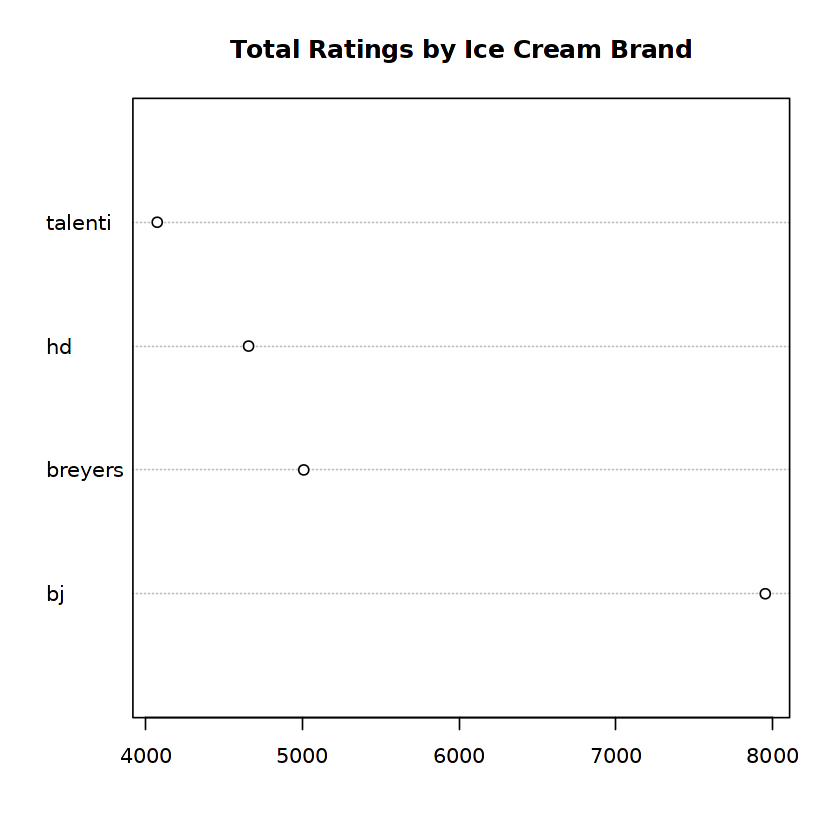

In [22]:
dotchart(aggregate$rating_count, main="Total Ratings by Ice Cream Brand", labels = aggregate$brand)

## Question 2

In [24]:
mybrands <- c("bj", "breyers", "talenti")
myfiles <- paste0("/anvil/projects/tdm/data/icecream/", mybrands, "/reviews.csv")
bigDF <- do.call(rbind, lapply(myfiles, fread))

In [25]:
head(bigDF)

  key  author         date       stars title                                  
1 0_bj Ilovebennjerry 2017-04-15 3     Not enough brownies!                   
2 0_bj Sweettooth909  2020-01-05 5     I\342\200\231m OBSESSED with this pint!
3 0_bj LaTanga71      2018-04-26 3     My favorite...More Caramel Please      
4 0_bj chicago220     2018-01-14 5     Obsessed!!!                            
5 0_bj Kassidyk       2020-07-24 1     Worst Ice Cream Ever!                  
6 0_bj Nikiera        2020-07-23 2     Way Too Salty                          
  helpful_yes helpful_no
1 10          3         
2  3          0         
3  5          2         
4 24          1         
5  1          5         
6  3          1         
  text                                                                                                                                                                                                                                                                          

In [27]:
sort(table(format(bigDF$date, "%m-%Y")),decreasing= TRUE)


07-2020 06-2020 09-2020 06-2018 05-2020 09-2017 07-2017 01-2019 04-2019 04-2020 
   1735     764     728     639     502     501     486     485     476     449 
07-2019 05-2019 03-2019 07-2018 06-2019 09-2018 03-2020 02-2020 08-2019 08-2018 
    437     427     425     403     401     378     373     366     366     346 
08-2017 05-2018 08-2020 01-2020 04-2018 02-2019 11-2018 10-2018 09-2019 03-2018 
    343     339     339     338     331     321     317     307     287     260 
12-2018 11-2019 10-2017 12-2019 10-2019 06-2017 01-2018 05-2017 02-2018 11-2017 
    258     249     238     233     230     219     217     213     187     184 
12-2017 04-2017 08-2016 04-2016 01-2017 07-2016 05-2016 03-2017 06-2016 03-2016 
    104     101      79      62      56      51      50      49      47      46 
09-2016 12-2016 10-2016 02-2017 11-2016 01-2016 11-2015 02-2016 10-2020 12-2015 
     46      36      35      32      32      27      22      16      16      10 
10-2015 
      5 

In [28]:
aggregate_2 <- aggregate(stars ~ year(date), data = bigDF, mean) 

In [29]:
aggregate_2

  year(date) stars   
1 2015       4.783784
2 2016       4.193548
3 2017       4.090657
4 2018       4.101959
5 2019       4.243256
6 2020       4.359358

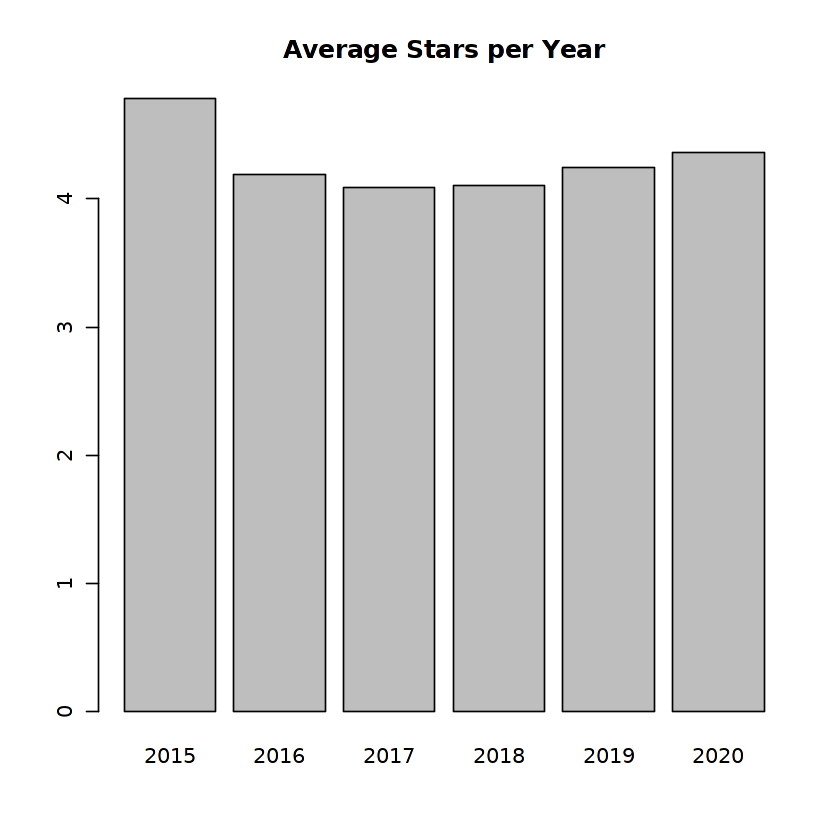

In [34]:
barplot(height=aggregate_2$stars, names= aggregate_2$year, main= "Average Stars per Year")

## Question 3

In [35]:
aggregate_3 <- aggregate(stars ~ key, data = bigDF, mean) 

In [49]:
aggregate_3 <- aggregate_3[order(aggregate_3$stars, decreasing = FALSE),]

In [51]:
head(aggregate_3)

    key        stars   
127 49_breyers 1.191011
131 50_bj      1.831325
134 51_breyers 2.423077
157 66_breyers 2.483871
95  38_breyers 2.621622
171 9_talenti  2.759615

In [52]:
bigDF[nchar(as.character(bigDF$text))>= 2500,]

  key        author      date       stars title                     helpful_yes
1 44_talenti TwirlyGirly 2019-08-28 1     Good idea; poor execution 2          
  helpful_no
1 8         
  text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Markdown notes and sentences and analysis written here.

## Question 4

In [53]:
head(sort(table(bigDF$author), decreasing = TRUE))


                    Anonymous       FuzzyGut     ChrisColby Phish Food Fan 
           366            177             43             12             11 
       Michael 
             8 

In [62]:
badReview <- subset(bigDF, author== "FuzzyGut" & stars == 1)

In [63]:
badReview$text

[1] "So this is the second pint of a peanut butter focused flavor (the first being peanut buttah core) where the swirls are rock hard and jammed in the middle of the pint! I don\342\200\231t get it. I have had countless Ben and Jerry\342\200\231s pints and most have been perfect but I have to admit this is really starting to bother me! It isn\342\200\231t supposed to be this way. I don\342\200\231t to stop exploring new flavors but I feel like maybe I should just stick to my tried-and-true favorites. I\342\200\231m sorry to be a downer but I\342\200\231m really not happy that 2 out of 2 peanut butter pints had inedible swirls and cores! I usually give gushing, glowing reviews on here and I\342\200\231m not a hard to please jerk. I just want ice cream I can eat."

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.